# Intro to Data Sciecne (71253) - Problem Set 3

## 1. Warm up - exporing the ANSUR II dataset

### Read the data from the file "ANSUR_II_all.csv" into a pandas dataframe.

> Make sure to use the first column in the csv file as the row index

In [1]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import scipy 
from scipy import stats

In [3]:
path = "/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/ANSUR_II_all.csv"
df= pd.read_csv(path, index_col=	"Unnamed: 0") # reading the file and drfine the first column as index
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
10027,266,1467,337,222,1347,253,202,401,369,274,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
10032,233,1395,326,220,1293,245,193,394,338,257,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
10033,287,1430,341,230,1327,256,196,427,408,261,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
10092,234,1347,310,230,1239,262,199,401,359,262,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
10093,250,1585,372,247,1478,267,224,435,356,263,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29501,285,1392,335,223,1297,252,196,368,299,312,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
29502,262,1324,301,202,1204,236,181,378,294,287,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
29503,260,1334,318,213,1259,234,183,363,332,299,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
29511,205,1293,302,199,1207,213,163,376,276,280,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [4]:
# Looking on the data:
print(f"We have {len(df.columns)} columns:")
print(df.columns)

We have 107 columns:
Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=107)


In [5]:
df.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,...,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,...,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670
std,37.400106,79.091048,20.720018,16.051833,72.022286,16.84502,13.516368,30.236914,41.519866,19.221034,...,31.617723,62.702388,156.528164,13.124513,47.650519,550.949948,0.979156,8.674650,3.861954,33.691952
min,155.000000,1115.000000,249.000000,156.000000,1038.000000,186.00000,151.000000,283.000000,216.000000,197.000000,...,289.000000,805.000000,358.000000,124.000000,672.000000,1.000000,1.000000,17.000000,56.000000,0.000000
25%,219.000000,1350.000000,313.000000,214.000000,1249.000000,232.00000,185.000000,376.000000,311.000000,262.000000,...,355.000000,988.000000,682.000000,159.000000,797.000000,1.000000,1.000000,23.000000,66.000000,150.000000
50%,242.000000,1410.000000,328.000000,225.000000,1302.000000,245.00000,195.000000,404.000000,341.000000,274.000000,...,375.000000,1033.000000,785.000000,170.000000,830.000000,1.000000,1.000000,28.000000,68.000000,173.000000
75%,271.000000,1462.000000,341.250000,235.000000,1349.000000,256.00000,204.000000,421.000000,370.000000,288.000000,...,398.000000,1076.000000,896.000000,179.000000,863.000000,2.000000,2.000000,36.000000,71.000000,196.000000
max,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.00000,245.000000,489.000000,490.000000,362.000000,...,494.000000,1245.000000,1442.000000,216.000000,1009.000000,42351.000000,8.000000,58.000000,94.000000,321.000000


### 1.1 Analyzing weights

Plot the distribution of 'weightkg', stratified by 'Gender'  

Text(0.5, 1.0, 'Weight Distribution by gender')

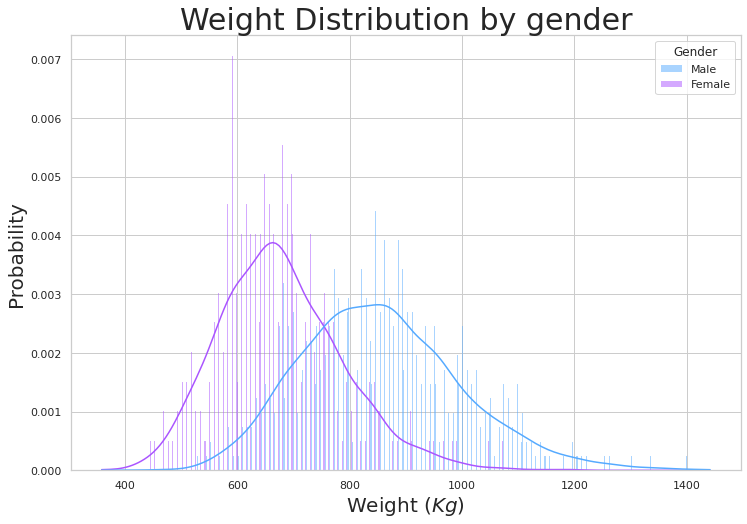

In [6]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, figsize=(12,8))
ax = sns.histplot(df, x="weightkg", hue='Gender',multiple="dodge",discrete=True,kde = True,fill=True,stat = 'probability',common_norm=False, palette="cool",shrink=0.5,alpha = 0.5)
ax.set_xlabel("Weight ($Kg$)",fontsize=20) #label and fontsize
ax.set_ylabel("Probability",fontsize=20)
ax.set_title("Weight Distribution by gender",fontsize=30)

We can see that the units are not correct so lets fix it:

Text(0.5, 1.0, 'Weight Distribution by gender')

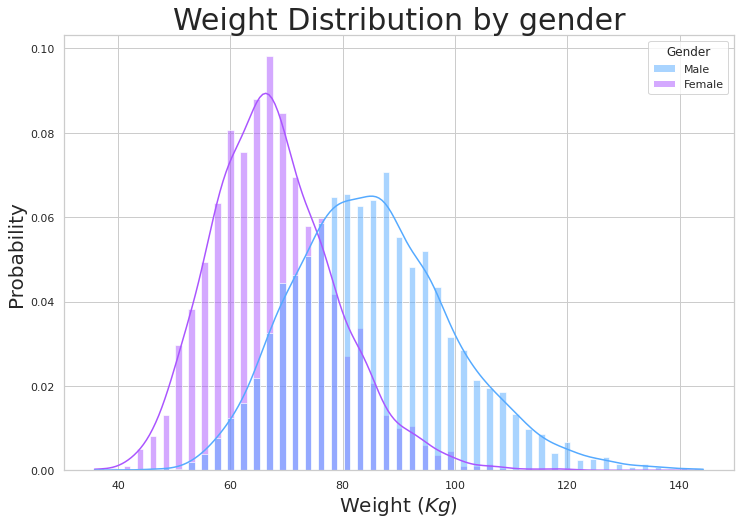

In [7]:
df["weight_kg"] = df["weightkg"]/10
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, figsize=(12,8))
ax = sns.histplot(df, x="weight_kg", hue='Gender',multiple="layer",kde = True,fill=True,stat = 'probability',common_norm=False, palette="cool",shrink=0.5,alpha = 0.5)
ax.set_xlabel("Weight ($Kg$)",fontsize=20) #label and fontsize
ax.set_ylabel("Probability",fontsize=20)
ax.set_title("Weight Distribution by gender",fontsize=30)

We can see from this plot that the average weight of men higher then women and the distribiution of men is also higher.

There is another variable describing weight called 'Weightlbs'.   
Make a scatter plot of 'weightkg' against 'Weightlbs'.

Text(0.5, 1.0, 'Weight (Kg) Vs weight (lbs)')

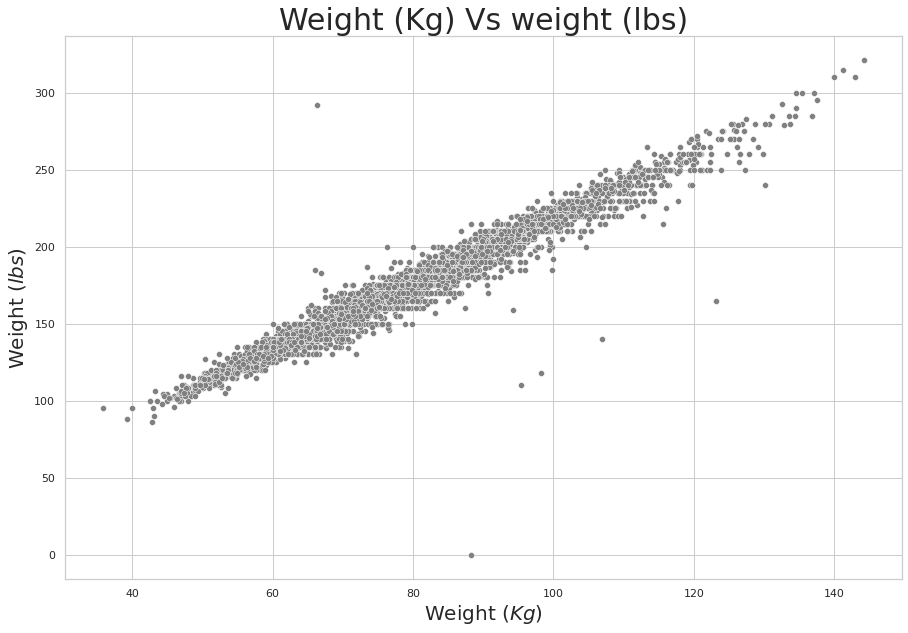

In [8]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, figsize=(15,10))
ax = sns.scatterplot(data=df,  x='weight_kg', y='Weightlbs', color="gray")
ax.set_xlabel("Weight ($Kg$)",fontsize=20)
ax.set_ylabel("Weight ($lbs$)",fontsize=20)
ax.set_title("Weight (Kg) Vs weight (lbs)",fontsize=30)

Is the relationship between these two variables consistent with your expectation?  
If not, what may explain the discrepency?

I expected to see a ratio of y = a*x which y is lbs and x is kg and a is a constant that express the ratio between them. but here we see good correlation but no straight line. 

The reason can be the fact that 1 kg  = 2.20462262 lbs so the ratio is not a intiger so the resulation is not so high and **the convertion is not acuurate**.

We also have some outliners who Caused due to calculation error or typing error...

## 1.2 Looking at the data a more broadly 

Make a pairplot of the first five variables

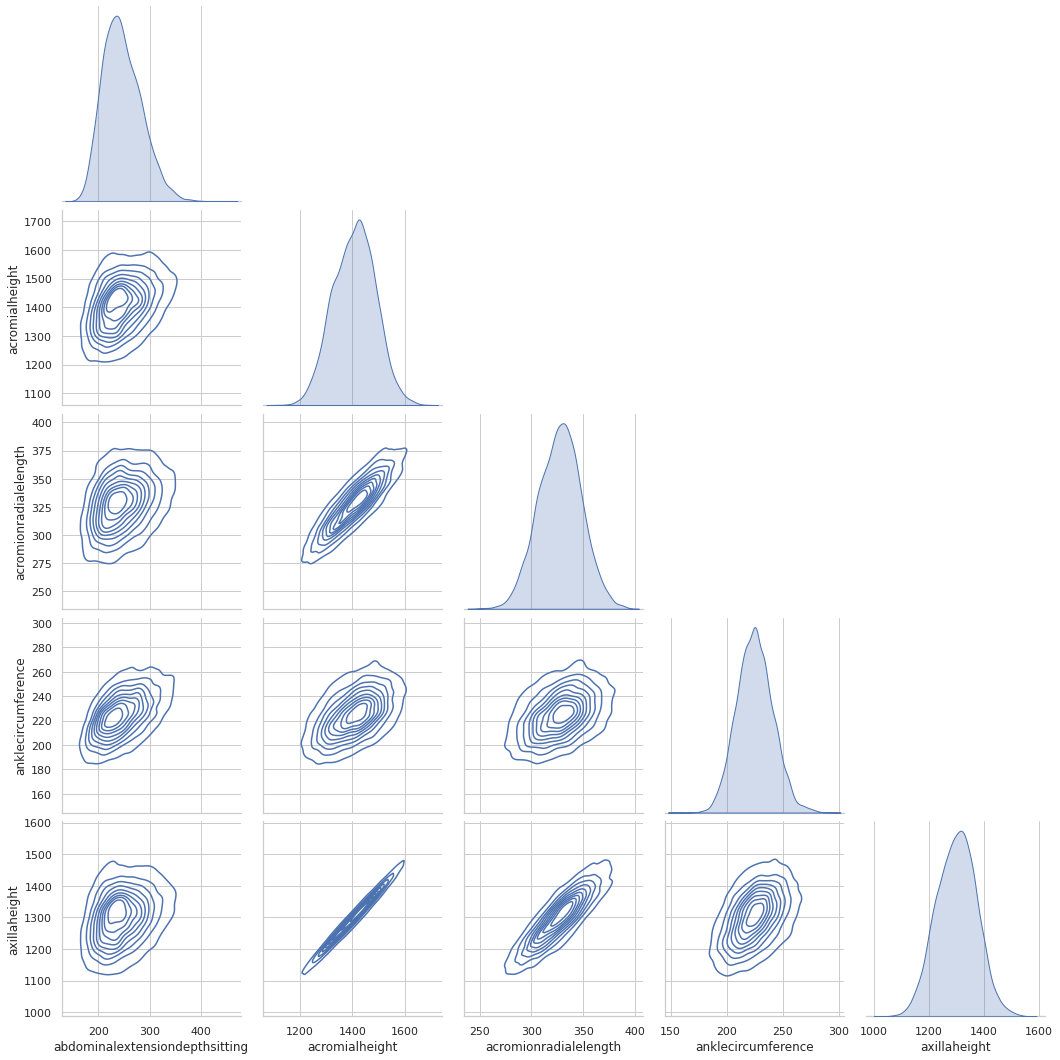

In [9]:
ax = sns.pairplot(data=df,
                  x_vars=df.columns[:5],
                  y_vars=df.columns[:5],
                 palette="cool",
                  kind="kde",
                  corner=True,
                  height=3)

Make a clustermap of the first 91 variables (these are the primary body size measurements).  
Transform the data as needed for clarity.  
Add row colors to indicate Gender.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


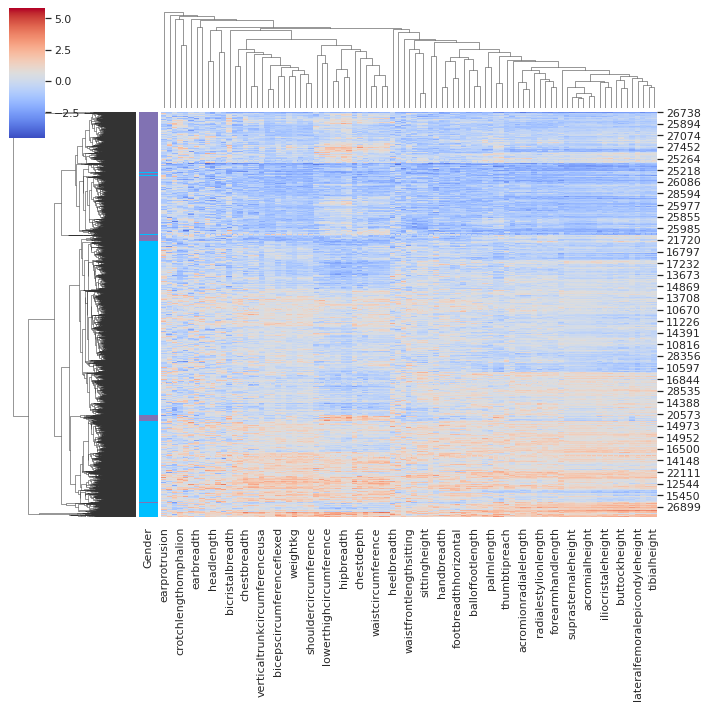

In [10]:
# New df based on the 91 columns of the dirst one
df_copy = df[df.columns[:91]].copy()

# define color to men and women:
gender_colors=df.Gender.map({
    'Male': 'deepskyblue',
    'Female': 'm'
})

# Create clustermap with standartization and row colors:
sns.clustermap(data = df_copy,z_score=1,row_colors=gender_colors,cmap ="coolwarm")


---

Looks that the gender can be the variable who can explain big part of the variability
🦾

## 2. The typical man

We're now interested in what does a 'typical' man look like. For that we'll look for people who are with 1 standard deviation of the population mean in all of their measurements. 

Calculate the fraction of men who are **expected** to be within 1 standard deviation of the population mean for all of (1, 2, 3, .., 30) different variables.  
  
> Assume that each variable is normaly distributed, and all variables are independent.

As we know in normaly distribution **68% of the data in all parameter is whithin 1 std** so we can calculate this fraction:

In [11]:
prob_within_1std = 0.6826
prob_30_vars = (prob_within_1std**30)
print(f"Probability to be within 1 std of the population mean for all of 30 variables\n\
is {prob_30_vars:g} or about 1 in {10**np.round(np.log10(1/prob_30_vars)):,.0f}")

Probability to be within 1 std of the population mean for all of 30 variables
is 1.05923e-05 or about 1 in 100,000


Process the data to get the fraction of men in the ANSUR II dataset who are within 1 standard deviation of the sample mean for all of the (1st, 2nd, 3rd, .., 30th) first variables in the dataset. 

> Note that we are restricting our analysis to men in this section.

Plot the expected and observed fraction of 'typical' men as a function of the number of variables considered (1 to 30)

Why are there so few 'typical' men?

Why are the expected and observed fractions of 'typical' men different?

In [12]:
#  Analize the data:

## create df for men:
df_men = df_copy[df["Gender"] =="Male"]
print(f"the new df has {len(df_men)} rows which mean that men are {int(100*len(df_men)/len(df))}% of the data")

## df with mean and std for all columns
df_men_mean = df_men.mean()
df_men_std = df_men.std()

## df for the men whithin 1 std:
men_std1 = pd.DataFrame(index=df_men.index)
men_std1[0] = True

## all mean & std of the first 30 vars:
for i in range(30):
    column = df_men.iloc[:,i]
    mean, std = column.mean(), column.std()
## check for each man if he's within 1 std
    men_std1[i+1] = abs(column - mean) < std

## only use True if all previous columns for him are True
    men_std1[i+1] = men_std1[i] & men_std1[i+1]
    
## count how many Trues are in the column
count_within = men_std1.apply(lambda x: pd.value_counts(x)[True], axis=0)

  


the new df has 4082 rows which mean that men are 67% of the data


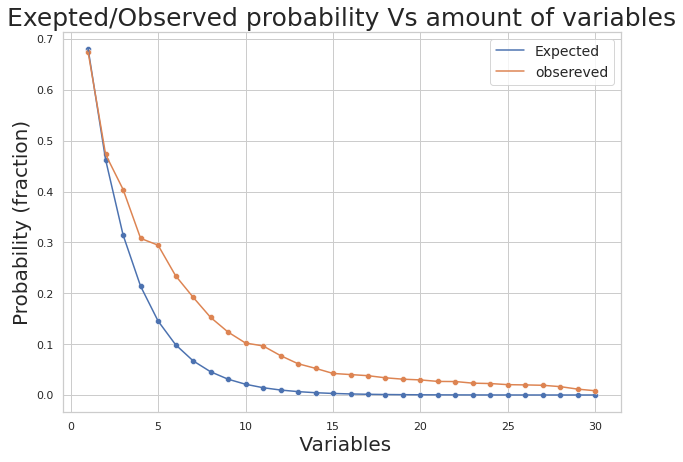

In [13]:
vars = np.arange(1,31,1)
prob = 0.68**vars

fig, ax = plt.subplots(1, figsize=(10,7))
# expected
ax = sns.scatterplot(x=vars, y=prob)
ax = sns.lineplot(x=vars, y=prob, label = "Expected")
# observed
x = range(1,31)
ax = sns.scatterplot(x=x, y=count_within[1:]/count_within[0])
ax = sns.lineplot(x=x, y=count_within[1:]/count_within[0], label='obsereved')
ax.set_xlabel(" Variables",fontsize=20)
ax.set_ylabel("Probability (fraction)",fontsize=20)
ax.set_title("Exepted/Observed probability Vs amount of variables",fontsize=25)
plt.legend(fontsize = 14)

As we can see, basicly we assumed that 68% are within one standard deviation for each individual variable. But when we want to look at the percent that are within one standard deviation **for many variables**, then it ends up being a very small fraction.


----

## 3. Using PCA for dimension reduction in the ANSUR dataset

In this part we'll focus on the first 91 variables, which are the primary body size measurements.

Perform PCA on the dataset (both males and females, first 91 variables)

In [14]:
from sklearn.decomposition import PCA

In [15]:
# df of 91 first vars:
df2 = df[df.columns[:91]].copy()
print(len(df2.columns))

91


In [16]:
# Normalize the data before applying the fit method
df_normalized=(df2 - df2.mean()) / df2.std()
pca = PCA(n_components=df2.shape[1])

# Apply the model
pca.fit(df_normalized)
df_pca = pca.transform(df_normalized)

Text(0.5, 1.0, 'PCA')

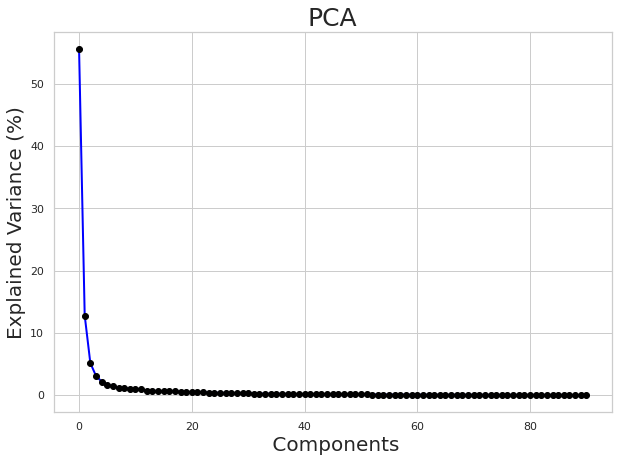

In [17]:
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df2.columns)

# Graph
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(pca.explained_variance_ratio_*100, lw =2,color = "blue")
ax.plot(pca.explained_variance_ratio_*100,'o',lw = 8,color = "black")
ax.set_xlabel(" Components",fontsize=20)
ax.set_ylabel("Explained Variance (%)",fontsize=20)
ax.set_title("PCA",fontsize=25)

Plot the first two principle components.  
Use the marker colors to indicate Males and Females.

Text(0.5, 1.0, 'PCA')

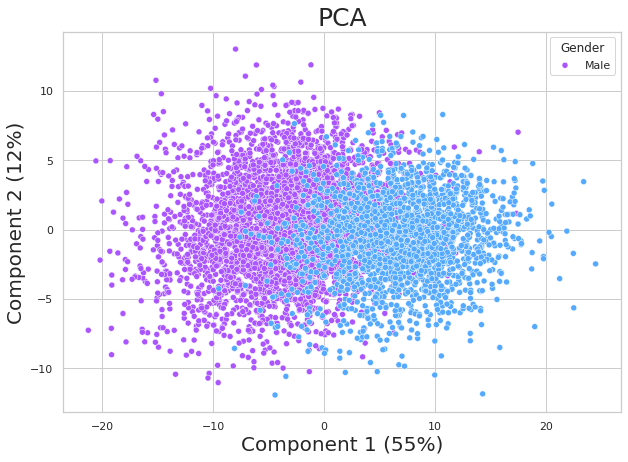

In [53]:
# Graph
fig, ax = plt.subplots(1, figsize=(10,7))
a  = df_pca.T
df["Gender"] = df["Gender"].astype('category')
df_gender = df["Gender"].cat.codes #encode for hue array
a  =pd.DataFrame({'x':a[0], 'y':a[1] , 'gender':df_gender.values})
ax =sns.scatterplot(data=a, x='x', y='y',hue = "gender",palette="cool",legend=False)
legend = ax.legend
plt.legend(title='Gender', loc='upper right', labels=["Male","Female"])
ax.set_xlabel(f"Component 1 ({int(pca.explained_variance_ratio_[0]*100)}%)",fontsize=20)
ax.set_ylabel(f"Component 2 ({int(pca.explained_variance_ratio_[1]*100)}%)",fontsize=20)
ax.set_title("PCA",fontsize=25)

How many principle components are required to capture/explain at least 85% of the variance in the data? 

In [20]:
print(f"The number of components that requried are {len([i for i in np.cumsum(pca.explained_variance_ratio_*100) if i<=85])} ")

The number of components that requried are 9 


Now compute the PCA for only the Males in the dataset. 
How many principle components are required to capture/explain at least 85% of the variance in the male-only data? 

In [56]:
# df of 91 first vars fo men:
df_men_pca = df_men[df_men.columns[:91]].copy()

# Normalize the data before applying the fit method
df_normalized_m=(df_men_pca -df_men_pca.mean()) / df_men_pca.std()
pca = PCA(n_components=df_men_pca.shape[1])

# Apply the model
pca.fit(df_normalized_m)
df_pca_m = pca.transform(df_normalized_m)

In [ ]:
# numpy
print(f"The number of components that requried for men are {len([i for i in np.cumsum(pca.explained_variance_ratio_*100) if i<=85])} ")

The number of components that requried for men are 15 


Text(0.5, 1.0, 'PCA - Men')

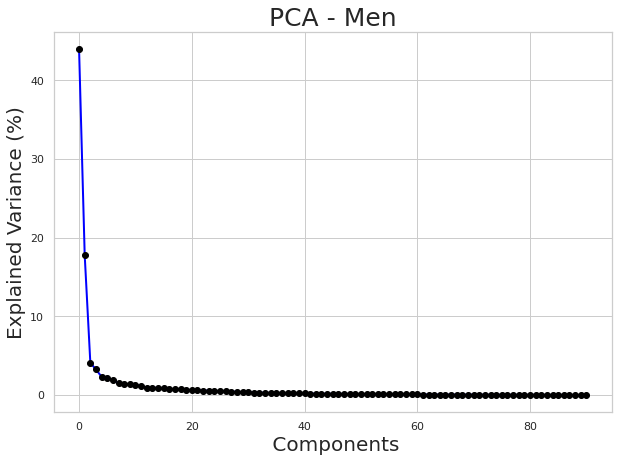

In [ ]:
#  Graph
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(pca.explained_variance_ratio_*100, lw =2,color = "blue")
ax.plot(pca.explained_variance_ratio_*100,'o',lw = 8,color = "black")
ax.set_xlabel(" Components",fontsize=20)
ax.set_ylabel("Explained Variance (%)",fontsize=20)
ax.set_title("PCA - Men",fontsize=25)

Why are more components needed to capture at least 85% of the variance in the male-only data, even though it contains less records?

When the data were for both Males & Females there were many variables whose differences were due to the fact that there are differences between men and women. Conversely when the data are only of men **the scattering of data around the mean becomes smaller** and there are fewer variables that dramatically affect the variance.